In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset (perhatikan tanda kutip di sekitar path)
df = pd.read_csv("/kaggle/input/obesitylevel/ObesityDataSet_raw_and_data_sinthetic (1).csv")

In [36]:
df.head(5)

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.0,Female,1.62,64.0,no,no,2.0,3.0,no,no,2.0,yes,0.0,1.0,Sometimes,Public_Transportation,Normal_Weight
1,21.0,Female,1.52,56.0,Sometimes,no,3.0,3.0,yes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,23.0,Male,1.80,77.0,Frequently,no,2.0,3.0,no,no,2.0,yes,2.0,1.0,Sometimes,Public_Transportation,Normal_Weight
3,27.0,Male,1.80,87.0,Frequently,no,3.0,3.0,no,no,2.0,no,2.0,0.0,Sometimes,Walking,Overweight_Level_I
4,22.0,Male,1.78,89.8,Sometimes,no,2.0,1.0,no,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


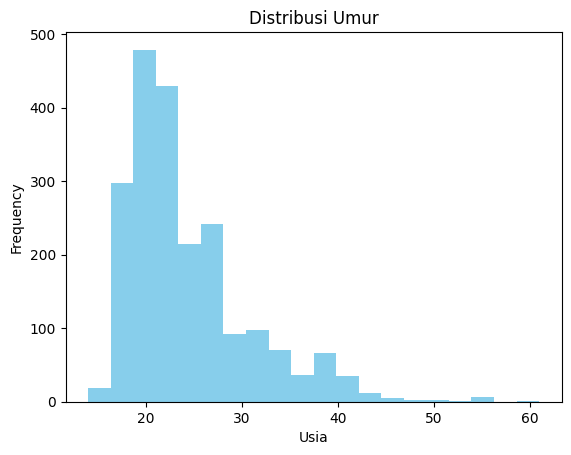

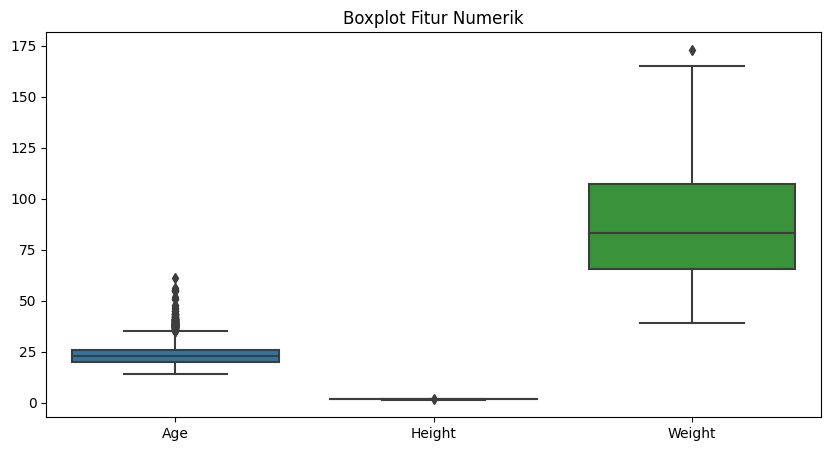

In [37]:
# Histogram
df['Age'].plot(kind='hist', bins=20, title='Distribusi Umur', color='skyblue')
plt.xlabel("Usia")
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Age', 'Height', 'Weight']])
plt.title("Boxplot Fitur Numerik")
plt.show()


In [38]:
# Encode fitur kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [39]:
# Pisahkan fitur dan target
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]


In [40]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, y, test_size=0.2, random_state=42)

knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train_raw, y_train_raw)
y_pred_raw = knn_raw.predict(X_test_raw)

accuracy_raw = accuracy_score(y_test_raw, y_pred_raw)
print("Akurasi TANPA Scaling:", accuracy_raw)

Akurasi TANPA Scaling: 0.8817966903073287


In [41]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split train dan test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Optimasi K (1 sampai 15)
k_range = range(1, 6)
cv_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

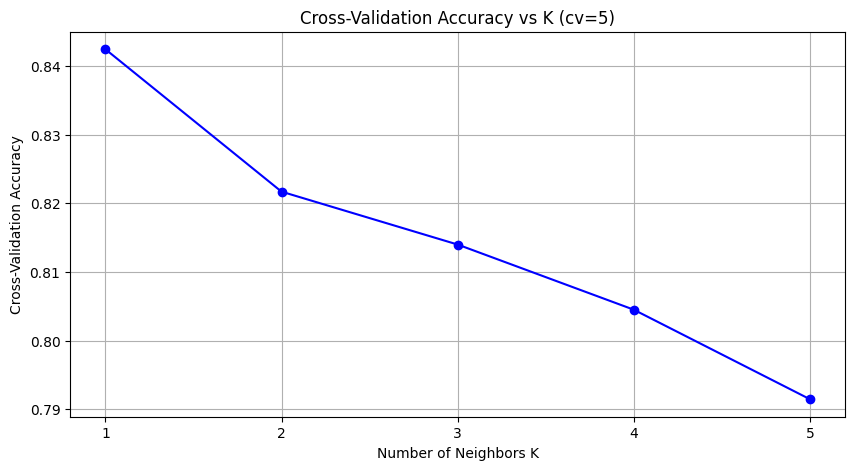

In [42]:
# Visualisasi akurasi terhadap nilai K
plt.figure(figsize=(10, 5))
plt.plot(k_range, cv_scores, marker='o', color='blue')
plt.title('Cross-Validation Accuracy vs K (cv=5)')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Cross-Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [43]:
# Gunakan K terbaik
best_k = k_range[np.argmax(cv_scores)]
print(f"Best K: {best_k} dengan akurasi cross-val: {max(cv_scores):.4f}")


Best K: 1 dengan akurasi cross-val: 0.8424


In [44]:
# Training dan evaluasi ulang model dengan K terbaik
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)
y_pred = knn_best.predict(X_test)


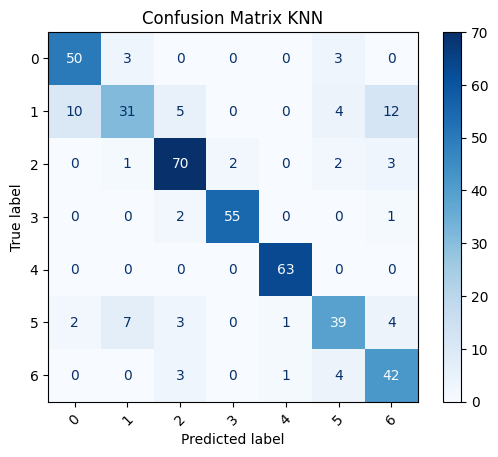

In [45]:
ConfusionMatrixDisplay.from_estimator(knn_best, X_test, y_test, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix KNN")
plt.show()

In [46]:
# Hasil evaluasi
print("\nAkurasi pada data test:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Akurasi pada data test: 0.8274231678486997

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        56
           1       0.74      0.50      0.60        62
           2       0.84      0.90      0.87        78
           3       0.96      0.95      0.96        58
           4       0.97      1.00      0.98        63
           5       0.75      0.70      0.72        56
           6       0.68      0.84      0.75        50

    accuracy                           0.83       423
   macro avg       0.82      0.82      0.82       423
weighted avg       0.83      0.83      0.82       423



TypeError: unsupported operand type(s) for +: 'int' and 'function'

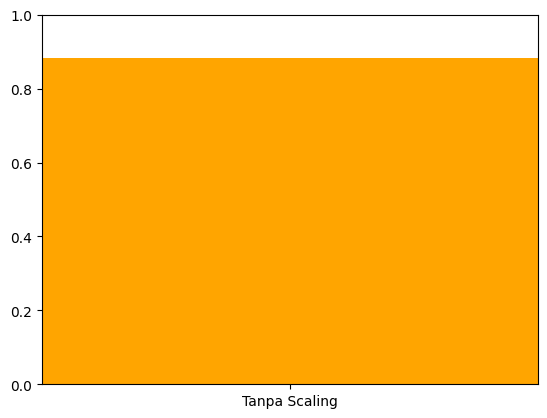

In [48]:
# Misal hasil akurasi disimpan di variabel:
labels = ['Tanpa Scaling', 'Dengan Scaling']
scores = [accuracy_raw, accuracy_score]

plt.bar(labels, scores, color=['orange', 'green'])
plt.title("Perbandingan Akurasi Sebelum vs Sesudah Scaling")
plt.ylabel("Akurasi")
plt.ylim(0, 1)
plt.show()
